In [1]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json
import warnings
warnings.simplefilter("ignore")
import seaborn as sns

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
#Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '03d01771-e4df-4ba3-9900-568e495e43f8',
}

session = Session()
session.headers.update(headers)

try:
    response = session.get(url, params=parameters)
    data = json.loads(response.text)
  #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
    print(e)

#NOTE:
# I had to go in and put "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"
# Into the Anaconda Prompt to change this to allow to pull data

# If that didn't work try using the local host URL as shown in the video

In [2]:
type(data)

dict

In [3]:
import pandas as pd


#This allows you to see all the columns, not just like 15
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
#This normalizes the data and makes it all pretty in a dataframe

df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now') 
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,9784,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.918344e+07,1.918344e+07,NaN,1,NaN,NaN,None,2022-10-19T10:57:00.000Z,19217.589747,2.834502e+10,-1.7153,-0.243055,-1.681568,0.396174,2.540707,-9.541131,-16.232356,3.686595e+11,39.8332,4.035694e+11,None,2022-10-19T10:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-10-19 10:59:18.858894
1,1027,Ethereum,ETH,ethereum,6141,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.223739e+08,1.223739e+08,NaN,2,NaN,NaN,None,2022-10-19T10:57:00.000Z,1301.569484,9.879884e+09,3.0661,-0.339027,-1.818941,0.170850,-1.109954,-20.257660,-13.620845,1.592781e+11,17.2119,1.592781e+11,None,2022-10-19T10:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-10-19 10:59:18.858894
2,825,Tether,USDT,tether,40977,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,6.845256e+10,7.014613e+10,NaN,3,NaN,NaN,None,2022-10-19T10:57:00.000Z,1.000067,3.778635e+10,0.1828,-0.003363,-0.002522,0.008193,-0.001619,0.000687,0.009690,6.845717e+10,7.3967,7.015085e+10,None,2022-10-19T10:57:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2022-10-19 10:59:18.858894
3,3408,USD Coin,USDC,usd-coin,6554,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,4.459229e+10,4.459229e+10,NaN,4,NaN,NaN,None,2022-10-19T10:57:00.000Z,1.000003,2.798349e+09,-4.6955,-0.003470,0.005198,-0.006727,-0.013333,-0.010251,0.009925,4.459243e+10,4.8182,4.459243e+10,None,2022-10-19T10:57:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2022-10-19 10:59:18.858894
4,1839,BNB,BNB,bnb,1126,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",2.000000e+08,1.610017e+08,1.610017e+08,NaN,5,NaN,NaN,None,2022-10-19T10:57:00.000Z,271.369138,5.461673e+08,-9.7865,-0.248932,-0.763474,-0.157931,3.717462,-5.635009,5.771661,4.369088e+10,4.7213,5.427383e+10,None,2022-10-19T10:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-10-19 10:59:18.858894
5,52,XRP,XRP,xrp,827,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,4.988702e+10,9.998926e+10,NaN,6,NaN,NaN,None,2022-10-19T10:57:00.000Z,0.456915,1.339702e+09,-4.2402,-0.425369,-2.711551,-6.254511,29.524892,33.810991,28.595622,2.279414e+10,2.4629,4.569152e+10,None,2022-10-19T10:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-10-19 10:59:18.858894
6,4687,Binance USD,BUSD,binance-usd,5307,2019-09-20T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, binance-...",NaN,2.162810e+10,2.162810e+10,NaN,7,NaN,NaN,None,2022-10-19T10:57:00.000Z,1.000181,6.901425e+09,-1.6283,0.036737,0.006786,0.052460,0.034965,-0.015957,0.012862,2.163201e+10,2.3373,2.163201e+10,None,2022-10-19T10:57:00.000Z,1839.0,BNB,BNB,bnb,BUSD-BD1,2022-10-19 10:59:18.858894
7,2010,Cardano,ADA,cardano,582,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.429204e+10,3.504502e+10,NaN,8,NaN,NaN,None,2022-10-19T10:57:00.000Z,0.357648,4.198880e+08,1.2119,-0.435669,-2.696743,-9.236247,-19.301822,-22.218762,-26.625281,1.226448e+10,1.3252,1.609416e+10,None,2022-10-19T10:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-10-19 10:59:18.858894
8,5426,Solana,SOL,solana,391,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,3.581142e+08,5.116169e+08,NaN,9,NaN,NaN,Non

In [5]:
df.isnull().sum()/len(df)*100

id                                      0.000000
name                                    0.000000
symbol                                  0.000000
slug                                    0.000000
num_market_pairs                        0.000000
date_added                              0.000000
tags                                    0.000000
max_supply                             66.666667
circulating_supply                      0.000000
total_supply                            0.000000
platform                              100.000000
cmc_rank                                0.000000
self_reported_circulating_supply       86.666667
self_reported_market_cap               86.666667
tvl_ratio                             100.000000
last_updated                            0.000000
quote.USD.price                         0.000000
quote.USD.volume_24h                    0.000000
quote.USD.volume_change_24h             0.000000
quote.USD.percent_change_1h             0.000000
quote.USD.percent_ch

In [6]:
df.columns

Index(['id', 'name', 'symbol', 'slug', 'num_market_pairs', 'date_added',
       'tags', 'max_supply', 'circulating_supply', 'total_supply', 'platform',
       'cmc_rank', 'self_reported_circulating_supply',
       'self_reported_market_cap', 'tvl_ratio', 'last_updated',
       'quote.USD.price', 'quote.USD.volume_24h',
       'quote.USD.volume_change_24h', 'quote.USD.percent_change_1h',
       'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d',
       'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d',
       'quote.USD.percent_change_90d', 'quote.USD.market_cap',
       'quote.USD.market_cap_dominance', 'quote.USD.fully_diluted_market_cap',
       'quote.USD.tvl', 'quote.USD.last_updated', 'platform.id',
       'platform.name', 'platform.symbol', 'platform.slug',
       'platform.token_address', 'timestamp'],
      dtype='object')

In [7]:
df.drop(['max_supply','platform','self_reported_circulating_supply','self_reported_market_cap','tvl_ratio','quote.USD.tvl','platform.id','platform.name','platform.symbol','platform.slug','platform.token_address'],axis=1,inplace=True)                      
                        


In [8]:
df.isnull().sum()/len(df)*100

id                                    0.0
name                                  0.0
symbol                                0.0
slug                                  0.0
num_market_pairs                      0.0
date_added                            0.0
tags                                  0.0
circulating_supply                    0.0
total_supply                          0.0
cmc_rank                              0.0
last_updated                          0.0
quote.USD.price                       0.0
quote.USD.volume_24h                  0.0
quote.USD.volume_change_24h           0.0
quote.USD.percent_change_1h           0.0
quote.USD.percent_change_24h          0.0
quote.USD.percent_change_7d           0.0
quote.USD.percent_change_30d          0.0
quote.USD.percent_change_60d          0.0
quote.USD.percent_change_90d          0.0
quote.USD.market_cap                  0.0
quote.USD.market_cap_dominance        0.0
quote.USD.fully_diluted_market_cap    0.0
quote.USD.last_updated            

In [9]:
df['timestamp'].unique()

array(['2022-10-19T10:59:18.858894000'], dtype='datetime64[ns]')

In [10]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    #Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '03d01771-e4df-4ba3-9900-568e495e43f8',
    }

    session = Session()
    session.headers.update(headers)

    try:
        response = session.get(url, params=parameters)
        data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
        print(e)

#NOTE:
# I had to go in and put "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"
# Into the Anaconda Prompt to change this to allow to pull data
    
    # Use this if you just want to keep it in a dataframe
    df2 = pd.json_normalize(data['data'])
    df2['Timestamp'] = pd.to_datetime('now')
    df = df.append(df2)


    # Use this if you want to create a csv and append data to it
    #df = pd.json_normalize(data['data'])
    #df['timestamp'] = pd.to_datetime('now')
    #df

    #if not os.path.isfile(r'C:\Users\alexf\OneDrive\Documents\Python Scripts\API.csv'):
        #df.to_csv(r'C:\Users\alexf\OneDrive\Documents\Python Scripts\API.csv', header='column_names')
    #else:
        #df.to_csv(r'C:\Users\alexf\OneDrive\Documents\Python Scripts\API.csv', mode='a', header=False)
        
    #Then to read in the file: df = pd.read_csv(r'C:\Users\alexf\OneDrive\Documents\Python Scripts\API.csv')

# If that didn't work try using the local host URL as shown in the video

In [11]:
import os 
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed')
    sleep(60) #sleep for 1 minute
exit()

API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed


KeyboardInterrupt: 

In [12]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,circulating_supply,total_supply,cmc_rank,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.last_updated,timestamp,max_supply,platform,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,quote.USD.tvl,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,Timestamp
0,1,Bitcoin,BTC,bitcoin,9784,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",1.918344e+07,1.918344e+07,1,2022-10-19T10:57:00.000Z,19217.589747,2.834502e+10,-1.7153,-0.243055,-1.681568,0.396174,2.540707,-9.541131,-16.232356,3.686595e+11,39.8332,4.035694e+11,2022-10-19T10:57:00.000Z,2022-10-19 10:59:18.858894,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
1,1027,Ethereum,ETH,ethereum,6141,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",1.223739e+08,1.223739e+08,2,2022-10-19T10:57:00.000Z,1301.569484,9.879884e+09,3.0661,-0.339027,-1.818941,0.170850,-1.109954,-20.257660,-13.620845,1.592781e+11,17.2119,1.592781e+11,2022-10-19T10:57:00.000Z,2022-10-19 10:59:18.858894,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
2,825,Tether,USDT,tether,40977,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",6.845256e+10,7.014613e+10,3,2022-10-19T10:57:00.000Z,1.000067,3.778635e+10,0.1828,-0.003363,-0.002522,0.008193,-0.001619,0.000687,0.009690,6.845717e+10,7.3967,7.015085e+10,2022-10-19T10:57:00.000Z,2022-10-19 10:59:18.858894,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
3,3408,USD Coin,USDC,usd-coin,6554,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",4.459229e+10,4.459229e+10,4,2022-10-19T10:57:00.000Z,1.000003,2.798349e+09,-4.6955,-0.003470,0.005198,-0.006727,-0.013333,-0.010251,0.009925,4.459243e+10,4.8182,4.459243e+10,2022-10-19T10:57:00.000Z,2022-10-19 10:59:18.858894,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
4,1839,BNB,BNB,bnb,1126,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",1.610017e+08,1.610017e+08,5,2022-10-19T10:57:00.000Z,271.369138,5.461673e+08,-9.7865,-0.248932,-0.763474,-0.157931,3.717462,-5.635009,5.771661,4.369088e+10,4.7213,5.427383e+10,2022-10-19T10:57:00.000Z,2022-10-19 10:59:18.858894,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
5,52,XRP,XRP,xrp,827,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",4.988702e+10,9.998926e+10,6,2022-10-19T10:57:00.000Z,0.456915,1.339702e+09,-4.2402,-0.425369,-2.711551,-6.254511,29.524892,33.810991,28.595622,2.279414e+10,2.4629,4.569152e+10,2022-10-19T10:57:00.000Z,2022-10-19 10:59:18.858894,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
6,4687,Binance USD,BUSD,binance-usd,5307,2019-09-20T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, binance-...",2.162810e+10,2.162810e+10,7,2022-10-19T10:57:00.000Z,1.000181,6.901425e+09,-1.6283,0.036737,0.006786,0.052460,0.034965,-0.015957,0.012862,2.163201e+10,2.3373,2.163201e+10,2022-10-19T10:57:00.000Z,2022-10-19 10:59:18.858894,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
7,2010,Cardano,ADA,cardano,582,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",3.429204e+10,3.504502e+10,8,2022-10-19T10:57:00.000Z,0.357648,4.198880e+08,1.2119,-0.435669,-2.696743,-9.236247,-19.301822,-22.218762,-26.625281,1.226448e+10,1.3252,1.609416e+10,2022-10-19T10:57:00.000Z,2022-10-19 10:59:18.858894,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
8,5426,Solana,SOL,solana,391,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",3.581142e+08,5.116169e+08,9,2022-10-19T10:57:00.000Z,30.038233,6.924510e+08,2.5106,-0.344580,-2.371248,-4.027836,-4.292100,-18.136285,-26.819751,1.075712e+10,1.1623,1.53

In [13]:
df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.287890,-1.715233,0.341828,2.460423,-9.526602,-16.057178
Ethereum,-0.400437,-1.899618,0.077996,-1.112299,-20.267380,-13.320412
Tether,-0.004438,-0.002690,0.008756,0.000610,-0.000980,0.008551
USD Coin,0.003519,-0.001682,-0.004767,-0.009316,-0.004130,-0.000141
BNB,-0.288084,-0.763008,-0.246041,3.562571,-5.628086,5.851491
XRP,-0.575963,-2.677019,-6.508149,29.310448,33.554239,28.632055
Binance USD,-0.007579,0.005245,0.001607,-0.037707,-0.036579,-0.009393
Cardano,-0.394535,-2.695124,-9.308457,-19.193514,-22.261490,-26.248179
Solana,-0.432605,-2.533897,-4.172635,-4.239231,-18.127776,-26.802649


In [14]:
df4 = df3.stack()
df4

name                                     
Bitcoin      quote.USD.percent_change_1h     -0.287890
             quote.USD.percent_change_24h    -1.715233
             quote.USD.percent_change_7d      0.341828
             quote.USD.percent_change_30d     2.460423
             quote.USD.percent_change_60d    -9.526602
             quote.USD.percent_change_90d   -16.057178
Ethereum     quote.USD.percent_change_1h     -0.400437
             quote.USD.percent_change_24h    -1.899618
             quote.USD.percent_change_7d      0.077996
             quote.USD.percent_change_30d    -1.112299
             quote.USD.percent_change_60d   -20.267380
             quote.USD.percent_change_90d   -13.320412
Tether       quote.USD.percent_change_1h     -0.004438
             quote.USD.percent_change_24h    -0.002690
             quote.USD.percent_change_7d      0.008756
             quote.USD.percent_change_30d     0.000610
             quote.USD.percent_change_60d    -0.000980
             quote.USD.

In [15]:
type(df4)

pandas.core.series.Series

In [16]:
df5 = df4.to_frame(name='values')
df5

values
name                                               
Bitcoin     quote.USD.percent_change_1h   -0.287890
            quote.USD.percent_change_24h  -1.715233
            quote.USD.percent_change_7d    0.341828
            quote.USD.percent_change_30d   2.460423
            quote.USD.percent_change_60d  -9.526602
            quote.USD.percent_change_90d -16.057178
Ethereum    quote.USD.percent_change_1h   -0.400437
            quote.USD.percent_change_24h  -1.899618
            quote.USD.percent_change_7d    0.077996
            quote.USD.percent_change_30d  -1.112299
            quote.USD.percent_change_60d -20.267380
            quote.USD.percent_change_90d -13.320412
Tether      quote.USD.percent_change_1h   -0.004438
            quote.USD.percent_change_24h  -0.002690
            quote.USD.percent_change_7d    0.008756
            quote.USD.percent_change_30d   0.000610
            quote.USD.percent_change_60d  -0.000980
            quote.USD.percent_change_90d   0.008551
USD Coin    quote.USD.percent_change_1h    0.003519
            quote.USD.percent_change_24h  -0.001682
            quote.USD.percent_change_7d   -0.004767
            quote.USD.percent_change_30d  -0.009316
            quote.USD.percent_change_60d  -0.004130
            quote.USD.percent_change_90d  -0.000141
BNB         quote.USD.percent_change_1h   -0.288084
            quote.USD.percent_change_24h  -0.763008
            quote.USD.percent_change_7d   -0.246041
            quote.USD.percent_change_30d   3.562571
            quote.USD.percent_change_60d  -5.628086
            quote.USD.percent_change_90d   5.851491
XRP         quote.USD.percent_change_1h   -0.575963
            quote.USD.percent_change_24h  -2.677019
            quote.USD.percent_change_7d   -6.508149
            quote.USD.percent_change_30d  29.310448
            quote.USD.percent_change_60d  33.554239
            quote.USD.percent_change_90d  28.632055
Binance USD quote.USD.percent_change_1h   -0.007579
            quote.USD.percent_change_24h   0.005245
            quote.USD.percent_change_7d    0.001607
            quote.USD.percent_change_30d  -0.037707
            quote.USD.percent_change_60d  -0.036579
            quote.USD.percent_change_90d  -0.009393
Cardano     quote.USD.percent_change_1h   -0.394535
            quote.USD.percent_change_24h  -2.695124
            quote.USD.percent_change_7d   -9.308457
            quote.USD.percent_change_30d -19.193514
            quote.USD.percent_change_60d -22.261490
            quote.USD.percent_change_90d -26.248179
Solana      quote.USD.percent_change_1h   -0.432605
            quote.USD.percent_change_24h  -2.533897
            quote.USD.percent_change_7d   -4.172635
            quote.USD.percent_change_30d  -4.239231
            quote.USD.percent_change_60d -18.127776
            quote.USD.percent_change_90d -26.802649
Dogecoin    quote.USD.percent_change_1h   -0.292861
            quote.USD.percent_change_24h  -0.156973
            quote.USD.percent_change_7d   -1.817759
            quote.USD.percent_change_30d   4.123360
            quote.USD.percent_change_60d -15.690733
            quote.USD.percent_change_90d -13.784771
Polygon     quote.USD.percent_change_1h   -0.254542
            quote.USD.percent_change_24h   0.814993
            quote.USD.percent_change_7d    8.725134
            quote.USD.percent_change_30d  16.482244
            quote.USD.percent_change_60d   7.466157
            quote.USD.percent_change_90d  -0.335474
Polkadot    quote.USD.percent_change_1h   -0.407476
            quote.USD.percent_change_24h  -1.042266
            quote.USD.percent_change_7d   -1.584325
            quote.USD.percent_change_30d  -2.370373
            quote.USD.percent_change_60d -17.749822
            quote.USD.percent_change_90d -16.808505
Dai         quote.USD.percent_change_1h   -0.050172
            quote.USD.percent_change_24h  -0.051133
            quote.USD.percent_change_7d   -0.038295
            quote.USD.percent_change_30d 

In [17]:
df5.count()

values    90
dtype: int64

In [18]:
#Because of how it's structured above we need to set an index. I don't want to pass a column as an index for this dataframe
#So I'm going to create a range and pass that as the dataframe. You can make this more dynamic, but I'm just going to hard code it


index = pd.Index(range(90))

# Set the above DataFrame index object as the index
# using set_index() function
df6 = df5.reset_index()
df6

# If it only has the index and values try doing reset_index like "df5.reset_index()"

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.287890
1,Bitcoin,quote.USD.percent_change_24h,-1.715233
2,Bitcoin,quote.USD.percent_change_7d,0.341828
3,Bitcoin,quote.USD.percent_change_30d,2.460423
4,Bitcoin,quote.USD.percent_change_60d,-9.526602
5,Bitcoin,quote.USD.percent_change_90d,-16.057178
6,Ethereum,quote.USD.percent_change_1h,-0.400437
7,Ethereum,quote.USD.percent_change_24h,-1.899618
8,Ethereum,quote.USD.percent_change_7d,0.077996
9,Ethereum,quote.USD.percent_change_30d,-1.112299


In [19]:
# Change the column name

df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.287890
1,Bitcoin,quote.USD.percent_change_24h,-1.715233
2,Bitcoin,quote.USD.percent_change_7d,0.341828
3,Bitcoin,quote.USD.percent_change_30d,2.460423
4,Bitcoin,quote.USD.percent_change_60d,-9.526602
5,Bitcoin,quote.USD.percent_change_90d,-16.057178
6,Ethereum,quote.USD.percent_change_1h,-0.400437
7,Ethereum,quote.USD.percent_change_24h,-1.899618
8,Ethereum,quote.USD.percent_change_7d,0.077996
9,Ethereum,quote.USD.percent_change_30d,-1.112299


In [20]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.287890
1,Bitcoin,24h,-1.715233
2,Bitcoin,7d,0.341828
3,Bitcoin,30d,2.460423
4,Bitcoin,60d,-9.526602
5,Bitcoin,90d,-16.057178
6,Ethereum,quote.USD.percent_change_1h,-0.400437
7,Ethereum,24h,-1.899618
8,Ethereum,7d,0.077996
9,Ethereum,30d,-1.112299


In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

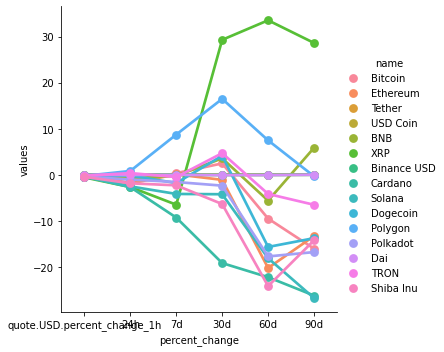

In [22]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

<AxesSubplot:xlabel='timestamp', ylabel='quote.USD.price'>

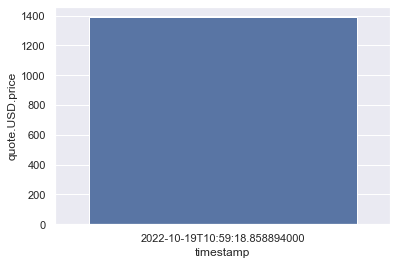

In [23]:
sns.set_theme(style="darkgrid")
sns.barplot(x='timestamp', y='quote.USD.price', data = df,ci=False)